In [1]:
from sklearn.model_selection import train_test_split
#使用scikit-learn产生非线性数据集
import numpy as np
import matplotlib.pyplot as plt
#矢量图
%matplotlib inline
%config InlineBackend.figure_format='svg'

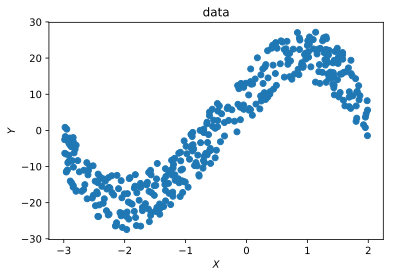

In [4]:
#生成数据

#数据集数量
n_samples=400
np.random.seed(666)
X=np.random.randint(-3, 2, size=n_samples)+np.random.random(size=n_samples)
Y=-80/27*X**3-40/9*X**2+160/9*X+260/27+15*(np.random.random(size=n_samples)-0.5)
X=X.reshape(-1,1)#将X化为列向量
Y=Y.reshape(-1,1)
fig=plt.figure()
ax=plt.gca()
ax.set(xlabel='$X$',ylabel='$Y$')
plt.title('data')
plt.scatter(X,Y)
plt.show()

#划定测试集占比
test_size=0.4

n_train=n_samples*(1-test_size)

#划分训练集与测试集
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=test_size, random_state=42)

In [28]:
#批量—随机梯度下降模型
class model():
    def __init__(self,batch_size,learning_rate,n_train,epoch,n):
        #超参数
        self.batch_size=batch_size
        self.learning_rate=learning_rate
        self.n_train=n_train
        self.iteration=self.n_train/self.batch_size
        self.epoch=epoch
        
        #多项式次数
        self.n=n
        #初始化权值
        self.w=np.random.rand(self.n,1)#0-1均匀分布
        self.b=0
        
        self.cost_T=[]
        self.cost_C=[]
    
    def y_pre(self,X):
        X_=[]
        for i in range(self.n):
            X_.append(X[0]**(i+1))
        y_pre=np.dot(X_,self.w)+self.b
        return y_pre
        
    def train(self,X_train,Y_train,X_test,Y_test):
        ite=0
        while ite<self.iteration*self.epoch:
            loss=0
            loss_=0
            err=0
            err_=0
            Sum=np.zeros((self.n,1))
            Sumb=0

            #随机选择size为batch_size的样本
            r=np.random.choice(range(X_train.shape[0]),self.batch_size,replace=False)
            for i in r:
                Y_pre=self.y_pre(X_train[i])
                for j in range(self.n):
                    Sum[j]+=(Y_pre-Y_train[i])*X_train[i]**(j+1)/self.batch_size
                Sumb+=(Y_pre-Y_train[i])/self.batch_size
             
            #权值更新
            if self.n==1:
                self.w-=self.learning_rate*Sum[0]
            else:
                for i in range(self.n):
                    self.w[i]-=self.learning_rate*Sum[i]
            self.b-=self.learning_rate*Sumb
            
            #the training loss of every iteration
            if ite%100==0:
                for i in range(X_train.shape[0]):
                    Y_p1=self.y_pre(X_train[i])
                    error=np.abs((Y_p1-Y_train[i]))/X_train.shape[0]
                    loss=loss+error
                    #the testing loss
                for i in range(X_test.shape[0]):
                    Y_p=self.y_pre(X_test[i])
                    error_=np.abs((Y_p-Y_test[i]))/X_test.shape[0]
                    loss_=loss_+error_
                    
                self.cost_T.append(loss)
                self.cost_C.append(loss_)
        
            ite+=1
         
        
            
    def plot_TC(self,X_train,Y_train):
        x=np.arange(1,self.iteration*self.epoch/100+1)
        fig=plt.figure(figsize=(12,10))
        ax1=fig.add_subplot(221)
        ax1.set_title('the loss of training')
        ax1.set_xlabel('iteration')
        ax1.set_ylabel('lost')
        ax1.plot(x,self.cost_T,linestyle=':')
        
        ax2=fig.add_subplot(222)
        ax2.set_title('the loss of testing')
        ax2.set_xlabel('iteration')
        ax2.set_ylabel('lost')
        ax2.plot(x,self.cost_C,linestyle='-.')
        
        ax3=fig.add_subplot(223)
        ax3.set_title('Comparison')
        ax3.set_xlabel('iteration')
        ax3.set_ylabel('loss')
        ax3.plot(x,self.cost_T,label='the loss of training')
        ax3.plot(x,self.cost_C,label='the loss of testing')
        ax3.legend(bbox_to_anchor=(1,1),loc="upper right",ncol=1)  
        
        ax4=fig.add_subplot(224)
        ax4.set_title('Fitting')
        ax4.set(xlabel='$X$',ylabel='$Y$')
        ax4.scatter(X_train,Y_train)
        X2=np.linspace(-3,2)
        y2=0
        for i in range(self.n):
            y2+=self.w[i]*X2**(i+1)
        y2+=self.b
        ax4.plot(X2,y2,c='green')
        
        plt.show()

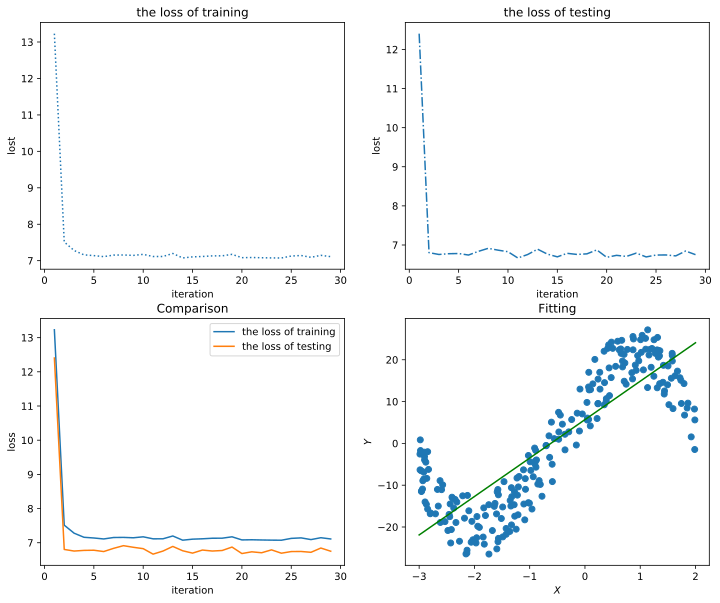

In [29]:
#线性模型+MSE
M1=model(10,0.012,n_train,120,1)
M1.train(X_train,y_train,X_test,y_test)
M1.plot_TC(X_train,y_train)

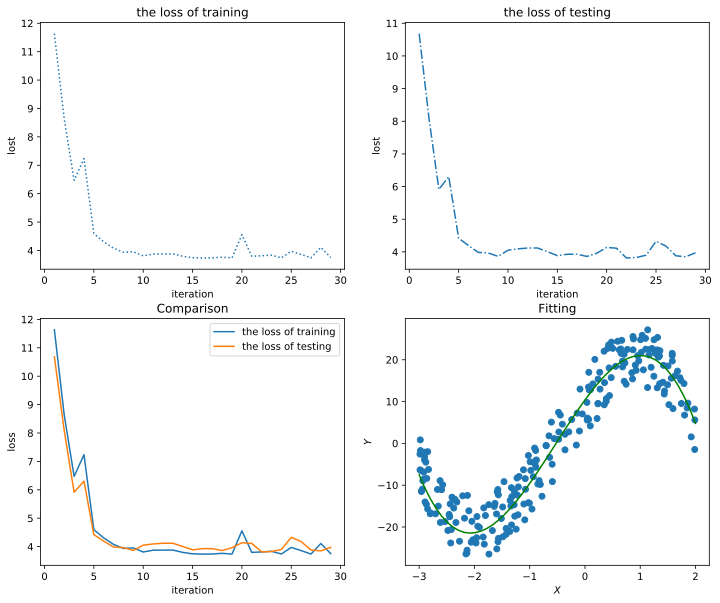

In [33]:
#三次多项式+MSE
M3=model(10,0.01,n_train,120,3)
M3.train(X_train,y_train,X_test,y_test)
M3.plot_TC(X_train,y_train)

可以看出明显单个loss对比线性模型少了很多，即偏差减少。

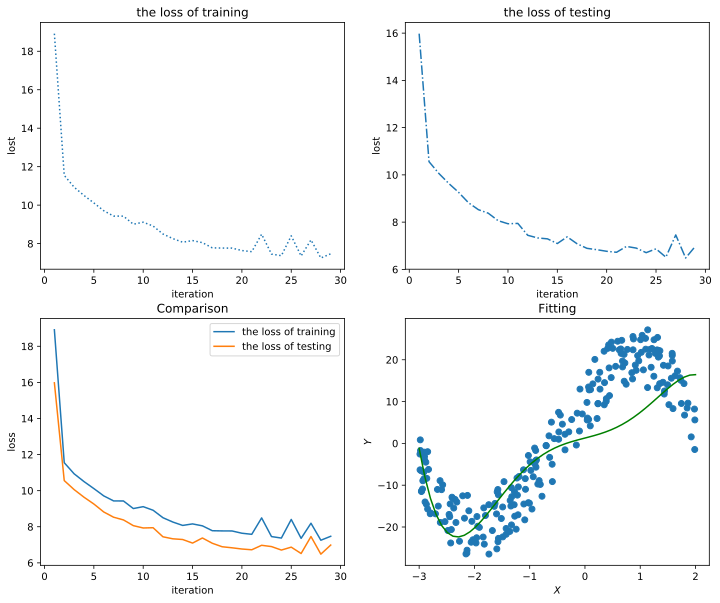

In [40]:
#五次多项式+MSE 迭代120轮
M5=model(10,0.00015,n_train,120,5)
M5.train(X_train,y_train,X_test,y_test)
M5.plot_TC(X_train,y_train)

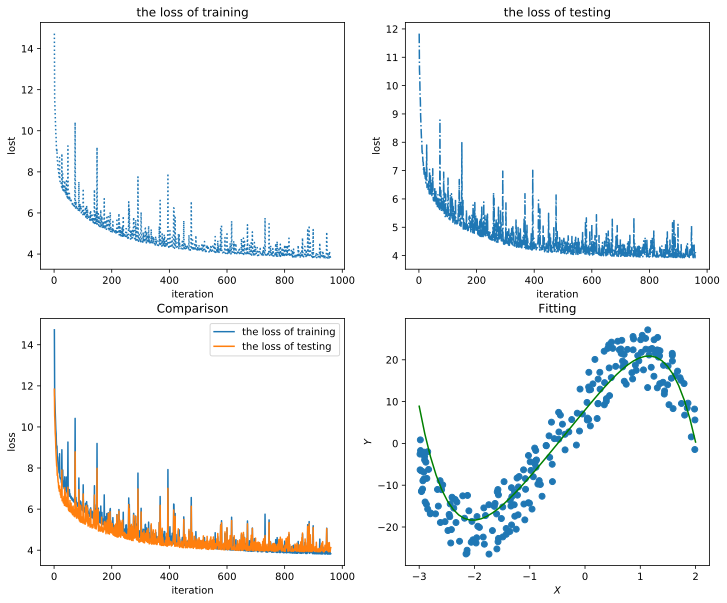

In [41]:
#五次多项式+MSE 迭代4000轮
M5_=model(10,0.00015,n_train,4000,5)
M5_.train(X_train,y_train,X_test,y_test)
M5_.plot_TC(X_train,y_train)

由上可知，因为是MSGD，模型越复杂，我们设置的学习率就应该越小，不然就会导致数值溢出。而且训练次数应该增多才能到达效果。
而且在bias减少的情况下，明显variance在增加。

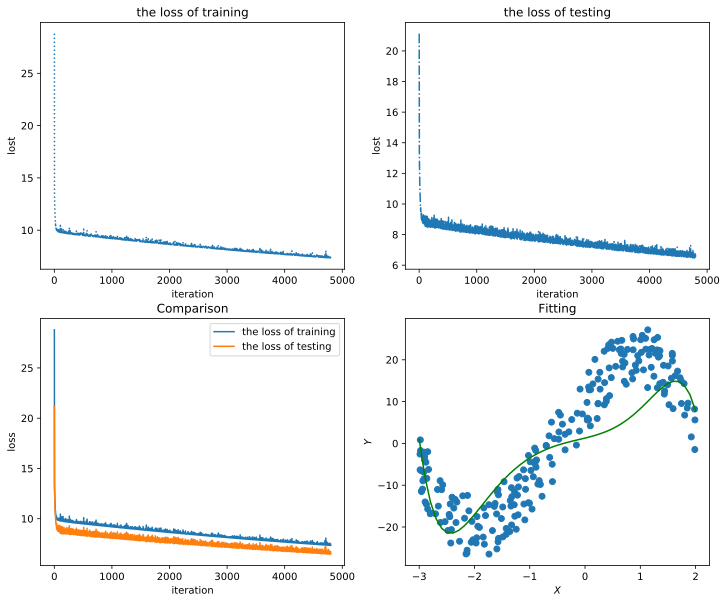

In [44]:
#7次多项式+MSE 迭代20000轮
M7=model(10,0.000001,n_train,20000,7)
M7.train(X_train,y_train,X_test,y_test)
M7.plot_TC(X_train,y_train)